Aufgabe: Implementiere ein Perzeptron
Du wirst ein einfaches Perzeptron implementieren, das die logische AND-Funktion
erlernt. Ein Perzeptron ist ein einfaches neuronales Netz mit einer Eingabeschicht und
einer Ausgabeschicht.

Aktivierungsfunktionen (Einsteiger)

Implementiere die folgenden Aktivierungsfunktionen:
1. Step-Funktion (binäre Entscheidung)
2. Sigmoid-Funktion (weiche Übergänge)
3. ReLU-Funktion (nur positive Werte)
4. Tanh-Funktion (Werte zwischen -1 und 1)

Deine Aufgabe: Ergänze die fehlenden Aktivierungsfunktionen.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Aktivierungsfunktionen
def step_function(x):
        # die Step-Funktion Gibt 1 zurück, wenn der Eingabewert größer oder gleich 0 ist, sonst 0.
        if x >= 0:
            return 1
        else:
            return 0
def sigmoid(x):
    # Gibt Werte zwischen 0 und 1 zurück.
    return 1 / (1 + np.exp(-x))  # Sigmoid: f(z)=1/(1+e(-z))
def relu(x):
    # Gibt 0 für negative Eingaben und den Eingabewert für positive Eingaben zurück.
    return max(0, x) # Rectified Linear Unit f(z)=max(0,z)
def tanh(x):
    # Gibt Werte zwischen -1 und 1 zurück.
    #return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))# Hyperbolische Tangens-Funktion f(z)=(ez - e(-z))/ (ez + e(-z))
    return np.tanh(x)

In [56]:
# Definieren der Funktion für Aktivation oben definierte Funktionen:
def get_activation_function(name):
    if name == 'step':
        return step_function
    elif name == 'sigmoid':
        return sigmoid
    elif name == 'relu':
        return relu
    elif name == 'tanh':
        return tanh
    else:
        return 'Fehlermeldanug: Dis Funktion wurde falsch gewählt'

Perzeptron-Klasse erstellen
Das Perzeptron benötigt:

Gewichte und Bias, die zufällig initialisiert werdenEine Methode  predict(x) , um Vorhersagen zu treffenEine Methode  train(X, y, epochs) , um das Modell zu trainieren

Deine Aufgabe: Implementiere die  predict() -Methode.

Training implementieren

Beim Training werden:Fehler berechnet: Fehlervariable = Soll - Ist

Gewichte und Bias aktualisiert:

Deine Aufgabe: Implementiere das Training.

In [57]:
class Perceptron: # Erstellen der Klasse Perceptron
    def __init__(self, input_size, learning_rate=0.1, activation='step'):
        self.weights = np.random.rand(input_size) - 0.5  # Gewichte
        self.bias = np.random.rand() - 0.5 # Bias wird random gewählt
        self.learning_rate = learning_rate # letnrate bestimmt, wie stark sich die Gewichte während des Trainings ändern
        self.activation_function = get_activation_function(activation) # Speichern der Aktivierungsfunktion
        
    def predict(self, x):
        #Berechnen der Summe: Skalarprodukt der Gewichte und Eingaben + Bias
        weighted_sum = np.dot(x, self.weights) + self.bias 
        return self.activation_function(weighted_sum)
    
    def train(self, X, y, epochs=10):
        for _ in range(epochs): # Training des Perzeptrons besteht aus mehreren Epochen - Wiederholungen.
            for i in range(len(X)): # für jedes Element X
                prediction = self.predict(X[i]) # vorhergesagte Ausgabe
                error = y[i] - prediction # Fehler = Sollwert (y) - vorhergesagte Ausgabe
                self.weights += self.learning_rate * error * X[i] #Neue Gewichte = Alte Gewichte + Lernrate × Fehler × Eingaben
                self.bias += self.learning_rate * error # Neuer Bias = Alter Bias + Lernrate × Fehler
    

Teste dein Modell
Nutze die logische AND-Funktion als Trainingsdaten:
Deine Aufgabe: Erstelle das Perzeptron und trainiere es.

In [58]:
# Beispiel-Daten für AND-Gatter
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Erstellen des Perzeptrons mit 2 Eingaben
perceptron = Perceptron(input_size=2, learning_rate=0.1, activation='step')

# Trainieren des Perzeptrons:
perceptron.train(X, y, epochs=10)

# Modell testen
predictions = [perceptron.predict(x) for x in X]
print("Vorhersagen:", predictions)


Vorhersagen: [0, 0, 0, 1]


Bonusaufgaben
1. Verändere die Lernrate und beobachte, wie sich das Training verhält.
2. Teste andere Aktivierungsfunktionen wie Sigmoid , Tanh oder ReLU.

In [59]:
# Beispiel-Daten für AND-Gatter
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Erstellen des Perzeptrons mit 2 Eingaben
perceptron = Perceptron(input_size=2, learning_rate=0.01, activation='step')

# Trainieren des Perzeptrons:
perceptron.train(X, y, epochs=10)

# Modell testen
predictions = [perceptron.predict(x) for x in X]
print("Vorhersagen:", predictions)

Vorhersagen: [0, 1, 0, 1]


In [60]:
# Beispiel-Daten für AND-Gatter
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Erstellen des Perzeptrons mit 2 Eingaben
perceptron = Perceptron(input_size=2, learning_rate=0.001, activation='step')

# Trainieren des Perzeptrons:
perceptron.train(X, y, epochs=10)

# Modell testen
predictions = [perceptron.predict(x) for x in X]
print("Vorhersagen:", predictions)

Vorhersagen: [0, 0, 1, 0]


In [61]:
# Beispiel-Daten für AND-Gatter
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Erstellen des Perzeptrons mit 2 Eingaben
perceptron = Perceptron(input_size=2, learning_rate=0.5, activation='step')

# Trainieren des Perzeptrons:
perceptron.train(X, y, epochs=10)

# Modell testen
predictions = [perceptron.predict(x) for x in X]
print("Vorhersagen:", predictions)

Vorhersagen: [0, 0, 0, 1]


In [62]:
for i in np.arange(0.0, 0.9, 0.01):  # np.arange erlaubt float-Schritte
    perceptron = Perceptron(input_size=2, learning_rate=i, activation='step')
    perceptron.train(X, y, epochs=10)
    predictions = [perceptron.predict(x) for x in X]
    print(i,"Vorhersagen:", predictions)
    

0.0 Vorhersagen: [0, 0, 0, 1]
0.01 Vorhersagen: [0, 0, 0, 1]
0.02 Vorhersagen: [0, 0, 1, 0]
0.03 Vorhersagen: [1, 0, 1, 0]
0.04 Vorhersagen: [0, 0, 0, 1]
0.05 Vorhersagen: [0, 0, 0, 1]
0.06 Vorhersagen: [0, 0, 0, 1]
0.07 Vorhersagen: [0, 0, 0, 1]
0.08 Vorhersagen: [0, 0, 0, 1]
0.09 Vorhersagen: [0, 0, 0, 1]
0.1 Vorhersagen: [0, 0, 0, 1]
0.11 Vorhersagen: [0, 0, 0, 1]
0.12 Vorhersagen: [0, 0, 0, 1]
0.13 Vorhersagen: [0, 0, 0, 1]
0.14 Vorhersagen: [0, 0, 0, 1]
0.15 Vorhersagen: [0, 0, 0, 1]
0.16 Vorhersagen: [0, 0, 0, 1]
0.17 Vorhersagen: [0, 0, 0, 1]
0.18 Vorhersagen: [0, 0, 0, 1]
0.19 Vorhersagen: [0, 0, 0, 1]
0.2 Vorhersagen: [0, 0, 0, 1]
0.21 Vorhersagen: [0, 0, 0, 1]
0.22 Vorhersagen: [0, 0, 0, 1]
0.23 Vorhersagen: [0, 0, 0, 1]
0.24 Vorhersagen: [0, 0, 0, 1]
0.25 Vorhersagen: [0, 0, 0, 1]
0.26 Vorhersagen: [0, 0, 0, 1]
0.27 Vorhersagen: [0, 0, 0, 1]
0.28 Vorhersagen: [0, 0, 0, 1]
0.29 Vorhersagen: [0, 0, 0, 1]
0.3 Vorhersagen: [0, 0, 0, 1]
0.31 Vorhersagen: [0, 0, 0, 1]
0.32 Vorhers

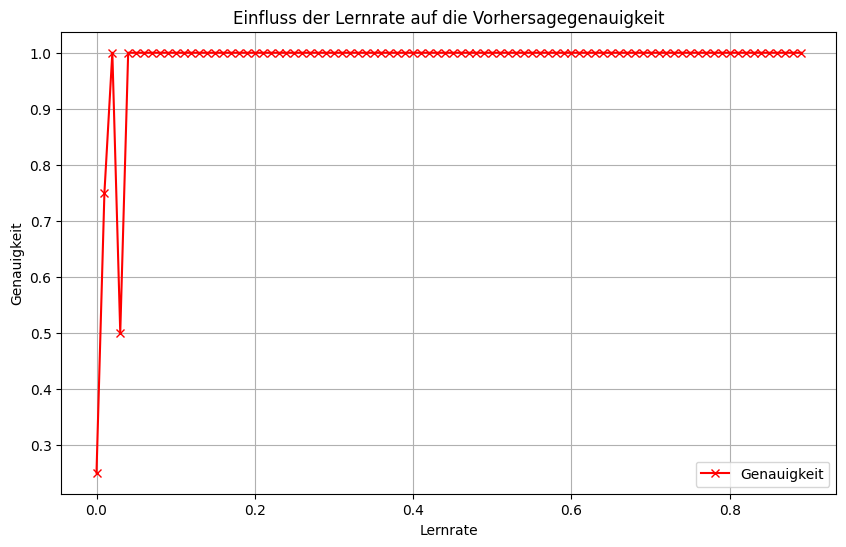

In [63]:
#Visualisierung:


genauigkeiten= []  # Liste für die Speicherung der Genauigkeit
learning_rates = np.arange(0.0, 0.9, 0.01)  # Lernraten von 0.0 bis 0.9 in 0.01-Schritten

for i in learning_rates:
    perceptron = Perceptron(input_size=2, learning_rate=i, activation='step')
    perceptron.train(X, y, epochs=10)
    predictions = [perceptron.predict(x) for x in X]
    
    # Berechnen der Genauigkeit:
    genauigkeit = sum(predictions == y) / len(y)
    genauigkeiten.append(genauigkeit)


plt.figure(figsize=(10,6))
plt.plot(learning_rates, genauigkeiten, marker='x', linestyle='-', color='r', label="Genauigkeit")
plt.xlabel("Lernrate")
plt.ylabel("Genauigkeit")
plt.title("Einfluss der Lernrate auf die Vorhersagegenauigkeit")
plt.legend()
plt.grid(True)
plt.show()


In [69]:
namen=['step', 'sigmoid', 'relu', 'tanh']

for name in namen:
    perceptron = Perceptron(input_size=2, learning_rate=0.1, activation=name)
    perceptron.train(X, y, epochs=10)
    predictions = [perceptron.predict(x) for x in X]
    print(name,  "Vorhersagen:", predictions)


step Vorhersagen: [0, 0, 0, 1]
sigmoid Vorhersagen: [np.float64(0.40262023816322523), np.float64(0.3779831692083773), np.float64(0.43998451924803234), np.float64(0.4146480699237595)]
relu Vorhersagen: [0, np.float64(0.34064931073758165), np.float64(0.32318267221686897), np.float64(0.6816661226376202)]
tanh Vorhersagen: [np.float64(-0.025020171704598373), np.float64(0.2705627799983333), np.float64(0.4006127776083312), np.float64(0.6211497774642776)]


Nur Step-funktion passt gut für AND-Aufgabe
